In [8]:
%matplotlib inline

In [9]:
import findspark
findspark.init

<function findspark.init>

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

##PROBLEM 1

In [11]:
def mandelbrot(x, y):
    z = c = complex(x, y)
    iteration = 0
    max_iteration = 511  # arbitrary cutoff
    while abs(z) < 2 and iteration < max_iteration:
        z = z * z + c
        iteration += 1
    return iteration

def sum_values_for_partitions(rdd):
    'Returns (as an RDD) the sum of V for each partition of a (K, V) RDD'
    # note that the function passed to mapPartitions should return a sequence,
    # not a value.
    return rdd.mapPartitions(lambda part: [sum(V for K, V in part)])

def draw_image(rdd):
    '''Given a (K, V) RDD with K = (I, J) and V = count,
    display an image of count at each I, J'''

    data = rdd.collect()
    I = np.array([d[0][0] for d in data])
    J = np.array([d[0][1] for d in data])
    C = np.array([d[1] for d in data])
    im = np.zeros((I.max() + 1, J.max() + 1))
    im[I, J] = np.log(C + 1)  # log intensity makes it easier to see levels
    plt.imshow(im, cmap=cm.gray)
    plt.show()

In [12]:
tuples = []
for i in xrange(2000):
    for j in xrange(2000):
        tuples.append((i,j))

In [13]:
partitions = sc.parallelize(tuples, 100).map(lambda xy: (xy, mandelbrot((xy[1]/500.0)-2,(xy[0]/500.0)-2)))

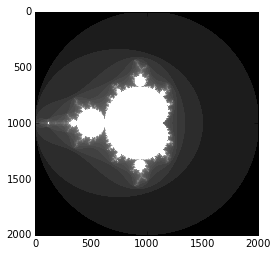

In [14]:
draw_image(partitions)

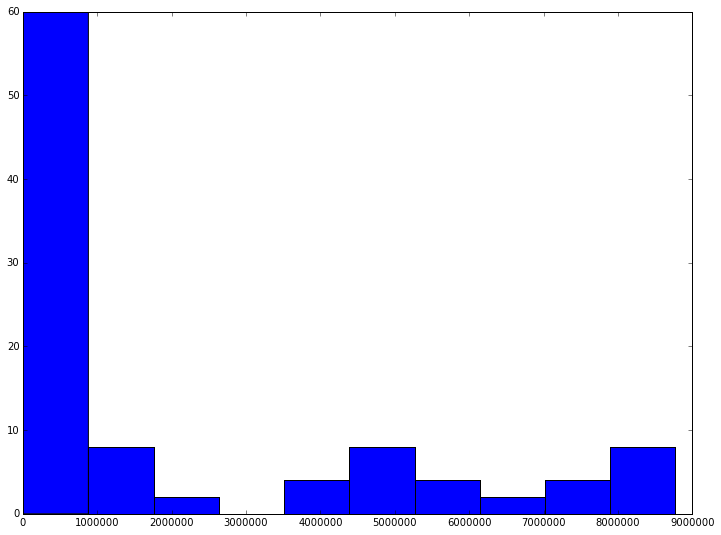

In [706]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]


# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.hist((sum_values_for_partitions(partitions)).collect())
# fig.set_size_inches(18.5, 10.5)
plt.savefig('P2a_hist.png', dpi=100)

In [57]:
partitions2 = sc.parallelize([0, 1999])

12

In [708]:
import random

random.randrange(0, 100, 1)
partitions3 = sc.parallelize(tuples).map(lambda xy: (xy, mandelbrot((xy[0]/500.0)-2,(xy[1]/500.0)-2))).partitionBy(100, lambda xy: int(np.sqrt((xy[0]-1000)**2 + (xy[1]-1000)**2)) % 100)


In [700]:
# random.randrange(0, 100, 1)
# partitions3 = sc.parallelize([0, 1999])
# partitions3 = sc.parallelize(partitions3.cartesian(partitions2).collect()).map(lambda xy: (xy, mandelbrot((xy[0]/500.0)-2,(xy[1]/500.0)-2))).partitionBy(100, lambda xy: random.randrange(0, 100, 1))
# partitions2 = sc.parallelize(tuples).map(lambda xy: (xy, mandelbrot((xy[1]/500.0)-2,(xy[0]/500.0)-2))).partitionBy(100, lambda xy: random.randrange(0, 100, 1))


In [701]:
partitions2.take(10)

[((0, 21), 0),
 ((0, 36), 0),
 ((0, 69), 0),
 ((0, 117), 0),
 ((0, 182), 0),
 ((0, 204), 0),
 ((0, 298), 0),
 ((0, 311), 0),
 ((0, 312), 0),
 ((0, 354), 0)]

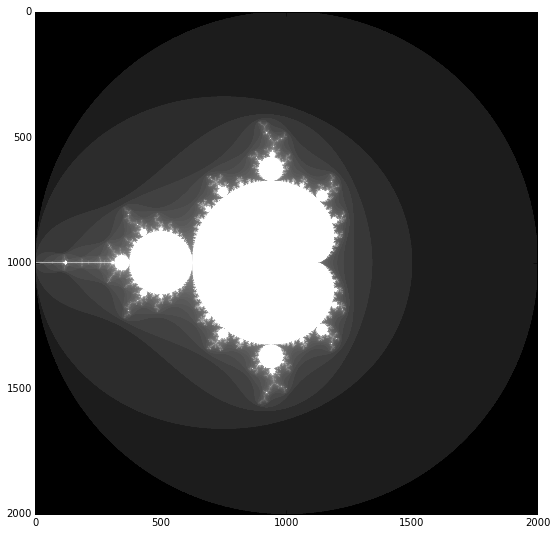

In [702]:
draw_image(partitions2)

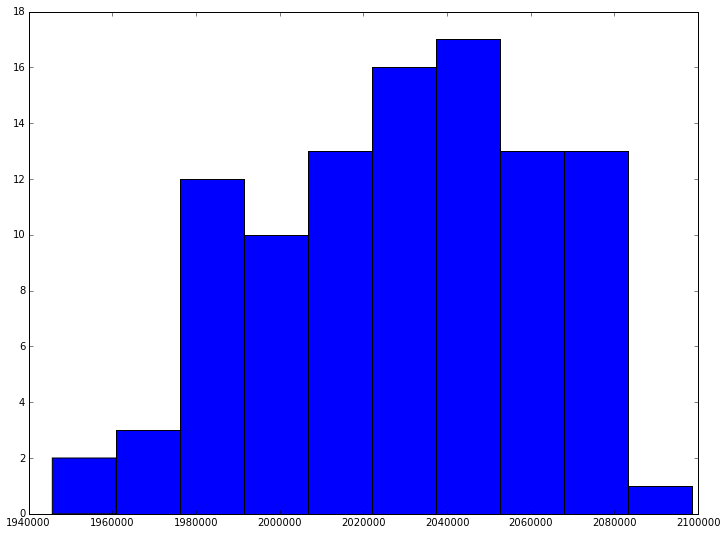

In [707]:
fig_size = plt.rcParams["figure.figsize"]


# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.hist((sum_values_for_partitions(partitions2)).collect())# fig.set_size_inches(18.5, 10.5)
plt.savefig('P2b_hist.png', dpi=100)



In [714]:
# partitions3 = sc.parallelize(tuples).map(lambda xy: (xy, mandelbrot((xy[0]/500.0)-2,(xy[1]/500.0)-2))).partitionBy(100, lambda xy: int(np.sqrt((xy[0]-1000)**2 + (xy[1]-1000)**2)) % 100)
partitions3 = sc.parallelize(tuples).map(lambda xy: (xy, mandelbrot((xy[0]/500.0)-2,(xy[1]/500.0)-2))).partitionBy(100, lambda xy: ((np.arccos(xy[0])+np.arcsin(xy[1]))%100))



plt.hist((sum_values_for_partitions(partitions3)).collect())# fig.set_size_inches(18.5, 10.5)


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 13706.0 failed 1 times, most recent failure: Lost task 1.0 in stage 13706.0 (TID 90822, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/isadoranun/Documents/CS205/spark-1.5.0/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/Users/isadoranun/Documents/CS205/spark-1.5.0/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Users/isadoranun/Documents/CS205/spark-1.5.0/python/lib/pyspark.zip/pyspark/serializers.py", line 133, in dump_stream
    for obj in iterator:
  File "/Users/isadoranun/Documents/CS205/spark-1.5.0/python/pyspark/rdd.py", line 1712, in add_shuffle_key
    yield pack_long(split)
  File "/Users/isadoranun/Documents/CS205/spark-1.5.0/python/lib/pyspark.zip/pyspark/serializers.py", line 538, in pack_long
    return struct.pack("!q", value)
ValueError: cannot convert float NaN to integer

	at org.apache.spark.api.python.PythonRDD$$anon$1.read(PythonRDD.scala:138)
	at org.apache.spark.api.python.PythonRDD$$anon$1.<init>(PythonRDD.scala:179)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:97)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:297)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:264)
	at org.apache.spark.api.python.PairwiseRDD.compute(PythonRDD.scala:311)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:297)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:264)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:88)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:214)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1280)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1268)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1267)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1267)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:697)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:697)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:697)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1493)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1455)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1444)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:567)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1813)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1826)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1839)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1910)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:905)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:147)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:108)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:306)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:904)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:373)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor41.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:497)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:379)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:207)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/isadoranun/Documents/CS205/spark-1.5.0/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/Users/isadoranun/Documents/CS205/spark-1.5.0/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Users/isadoranun/Documents/CS205/spark-1.5.0/python/lib/pyspark.zip/pyspark/serializers.py", line 133, in dump_stream
    for obj in iterator:
  File "/Users/isadoranun/Documents/CS205/spark-1.5.0/python/pyspark/rdd.py", line 1712, in add_shuffle_key
    yield pack_long(split)
  File "/Users/isadoranun/Documents/CS205/spark-1.5.0/python/lib/pyspark.zip/pyspark/serializers.py", line 538, in pack_long
    return struct.pack("!q", value)
ValueError: cannot convert float NaN to integer

	at org.apache.spark.api.python.PythonRDD$$anon$1.read(PythonRDD.scala:138)
	at org.apache.spark.api.python.PythonRDD$$anon$1.<init>(PythonRDD.scala:179)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:97)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:297)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:264)
	at org.apache.spark.api.python.PairwiseRDD.compute(PythonRDD.scala:311)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:297)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:264)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:88)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:214)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


##PROBLEM 3

In [84]:
wlist = sc.textFile('./P3/EOWL_words.txt')

In [85]:
wlist2 = wlist.map(lambda line: (''.join(sorted(line)), (line)))

In [89]:
wlist3 = wlist2.groupByKey().mapValues(lambda x: [i for i in x ]).map(lambda y: (y[0],len(y[1]),y[1]))

In [1291]:
wlist3.take(10)

[(u'aacikrtu', 1, [u'autarkic']),
 (u'aerrs', 2, [u'rears', u'serra']),
 (u'eiilrsttw', 1, [u'twirliest']),
 (u'eiills', 1, [u'lilies']),
 (u'ceilnrstu', 1, [u'linctures']),
 (u'iilps', 1, [u'pilis']),
 (u'dgiinoww', 1, [u'widowing']),
 (u'ehostw', 1, [u'theows']),
 (u'deinnru', 1, [u'inurned']),
 (u'degillnw', 1, [u'dwelling'])]

In [93]:
#We find the combination of letters with more annagrams
wlist3.takeOrdered(1,lambda x: -x[1])

[(u'aerst',
  11,
  [u'arets',
   u'aster',
   u'rates',
   u'reast',
   u'resat',
   u'stare',
   u'stear',
   u'strae',
   u'tares',
   u'tears',
   u'teras'])]

##PROBLEM 4

In [32]:
superheroes = sc.textFile('./P4/source.csv')

In [33]:
superheroes.take(3)

[u'"FROST, CARMILLA","AA2 35"',
 u'"KILLRAVEN/JONATHAN R","AA2 35"',
 u'"M\'SHULLA","AA2 35"']

In [34]:
ByArticle = superheroes.map(lambda line: (line.split('","')[1][:-1], line.split('","')[0][1:]))

In [35]:
ByArticle.take(3)

[(u'AA2 35', u'FROST, CARMILLA'),
 (u'AA2 35', u'KILLRAVEN/JONATHAN R'),
 (u'AA2 35', u"M'SHULLA")]

In [36]:
joined = ByArticle.join(ByArticle).values().groupByKey()

In [37]:
joined.take(3)

[(u'QUESADA, JOE', <pyspark.resultiterable.ResultIterable at 0x182d74790>),
 (u'SARACEN', <pyspark.resultiterable.ResultIterable at 0x182d74c10>),
 (u'DREAMING CELESTIAL/T',
  <pyspark.resultiterable.ResultIterable at 0x182d74a90>)]

In [162]:
def remove_member(setHeroes, member):
    setHeroes.remove(member)
    return list(setHeroes)

Hero_graph = joined.map(lambda x: (x[0], remove_member(set(x[1]),x[0]))).cache()

In [39]:
def BFS(nodes):
    
    #We set the starting node to have distance = 0 
    dic = {nodes[0]:0}

    for distance in range(10):
        neighbors = Hero_graph.filter(lambda x:  x[0] in nodes).flatMap(lambda x: x[1])
        unique_neighbors = neighbors.distinct().filter(lambda x: x not in dic)
        nodes = unique_neighbors.collect()
        BFS = [(x, distance +1) for x in nodes]
        dic = dict(dic.items() +  (BFS))                
    return dic


In [267]:
dic = BFS(['CAPTAIN AMERICA'])   #'MISS THING/MARY' 'CAPTAIN AMERICA'
# print dic
print (dic)

{u'QUESADA, JOE': 1, u'ZEITGEIST II/AXEL CL': 2, u'DREAMING CELESTIAL/T': 1, u'PIECEMEAL/GILBERT BE': 1, u'BENWAY, DR.': 1, u'FRIEDLANDER, SHARON': 2, u'LOGA II': 2, u'MODRED THE MYSTIC': 1, u'THOMAS, DR. STAN': 2, u'FIREWALL/THEARY/MIN ': 2, u'DR. FAUSTUS': 1, u'RAYMOND, NORA JONES': 1, u'24-HOUR MAN/EMMANUEL': 3, u'MARROW/SARAH ': 1, u'EPOCH': 1, u'WHITE TIGER/HECTOR A': 2, u'CHEMISTRO III': 2, u'OMNIBUS/LT. DALLAS': 1, u'GRIS-GRIS': 2, u'WHIZZER III/JAMES SA': 1, u'KORATH THE PURSUER': 1, u'OMEGA RED/ARKADY ROS': 2, u'WOLFE, HEDY': 1, u'SCIMITAR': 2, u'CRIMEWAVE/': 2, u'AURORA/JEANNE-MARIE ': 1, u"O'CONNELL, TARYN": 2, u'CYBERTOOTH/YEN HSIEH': 2, u'THORPE, LUKE': 2, u'TITHE COLLECTOR': 2, u'DUNER, MAJOR': 1, u'RENKO, DR. IRENO': 2, u'RONAN THE ACCUSER [K': 1, u'DAVIDOFF': 2, u'CORDITE': 2, u'VESTA': 2, u'HYBRID/JAMES JIMMY M': 2, u'RATLIFF, OFFICER LAR': 2, u'CAPTAIN HIP/FRED MAC': 2, u'NOM': 2, u'QABIRI': 2, u'BUEL': 2, u'TIMEBOMB/LOUIS JOUBE': 2, u'MODEM/': 2, u'NOX': 2, u'NOY': 2

In [682]:
def filterer(i):
    def filt(x):
        return x==itr_acc.value
    return filt

def get_first_non_empty_cogroup(x2):
    for elem in x2:
        elem = list(elem)
        if len(elem) > 0:
            return elem[0]

def BFS(graph, starting_node):
    
        #We set the starting node to have distance = 0 
    nodes = sc.parallelize([(starting_node, 1)])

    total_char_acc = sc.accumulator(1)
    it_acc = sc.accumulator(0)

    while True:
        it_acc += 1
        dist = it_acc.value

        nodes_2 = nodes.filter(lambda x: filterer(x[1])).join(graph).flatMap(lambda x: x[1][1]).distinct().map(lambda x: (x, dist + 1))

        nodes = nodes.cogroup(nodes_2).map(lambda x: (x[0], get_first_non_empty_cogroup(list(x[1])))).cache()

        print "CHAR SIZE: ", nodes.count()
        print "NODES ADDED: ", nodes.count() - total_char_acc.value

        if nodes.count() == total_char_acc.value:
            break

        total_char_acc += nodes.count() - total_char_acc.value
        
    return nodes.count(), nodes

In [683]:
BFS(Hero_graph, 'CAPTAIN AMERICA')

TypeError: map() got an unexpected keyword argument 'numPartitions'

##PROBLEM 5

In [42]:
links = sc.textFile('s3://Harvard-CS205/wikipedia/links-simple-sorted.txt')
page_names = sc.textFile('s3://Harvard-CS205/wikipedia/titles-sorted.txt')

In [566]:
def filterer(i):
    def filt(x):
        return x==itr_acc.value - 1
    return filt

def get_first_non_empty_cogroup(x2):
    for elem in x2:
        elem = list(elem)
        if len(elem) > 0:
            return elem[0]

def shortest_path(graph, nodeA, nodeB):
    

    nodes = sc.parallelize([(nodeA, 0)])
    node_destination = [nodeB]
    # a = a.map(lambda x: (x[0], (list(x[1][0]))[0], (list(x[1][1]))))

    total_char_acc = sc.accumulator(1)
    it_acc = sc.accumulator(0)
    nodes_4 = sc.parallelize([])


    while True:
        it_acc += 1
        dist = it_acc.value
        #     nodes = a.filter(lambda x: x[2] == [dist]).flatMap(lambda x: [(i, dist + 1) for i in x[1]]).distinct()
        nodes_2 = nodes.filter(lambda x: filterer(x[1])).join(graph).flatMap(lambda x: x[1][1]).distinct().map(lambda x: (x, dist))

        nodes_3 = nodes.filter(lambda x: filterer(x[1])).join(graph).map(lambda x: (x[0],x[1][1],dist))
        nodes_3 = nodes_3.map(lambda x: [(x[0], i, dist) for i in x[1]])
        
        print nodes_3.collect()
        
        nodes_4 = nodes_3.union(nodes_4)


        nodes = nodes.cogroup(nodes_2).map(lambda x: (x[0], get_first_non_empty_cogroup(list(x[1])))).cache()

#         print nodes_2.map(lambda x: x[0]).collect()
        
        if nodes_2.map(lambda x: x[0]).filter(lambda x: node_destination[0] == x).count() > 0:
            print "Distance:", dist
            break


    path = [node_destination]
    nodes_4 = nodes_4.flatMap(lambda x: x)

    for i in range(dist,0,-1):

        node_destination = nodes_4.filter(lambda x: x[2] == i and x[1] in node_destination[:]).map(lambda x: x[0]).distinct().collect()
    
        path.append(node_destination)

    return dist, path


In [567]:
shortest_path(neighbor_graph,3,10)

[[(3, 2, 1), (3, 1, 1)]]
[[(1, 2, 2), (1, 3, 2), (1, 4, 2)], [(2, 4, 2), (2, 5, 2), (2, 6, 2)], [(3, 2, 2), (3, 1, 2)]]
[[(1, 2, 3), (1, 3, 3), (1, 4, 3)], [(2, 4, 3), (2, 5, 3), (2, 6, 3)], [(3, 2, 3), (3, 1, 3)], [(4, 3, 3), (4, 5, 3), (4, 7, 3)], [(5, 4, 3), (5, 1, 3), (5, 9, 3)], [(6, 3, 3), (6, 2, 3), (6, 1, 3)]]
[[(1, 2, 4), (1, 3, 4), (1, 4, 4)], [(2, 4, 4), (2, 5, 4), (2, 6, 4)], [(3, 2, 4), (3, 1, 4)], [(4, 3, 4), (4, 5, 4), (4, 7, 4)], [(5, 4, 4), (5, 1, 4), (5, 9, 4)], [(6, 3, 4), (6, 2, 4), (6, 1, 4)], [(7, 9, 4), (7, 10, 4), (7, 2, 4)], [(9, 8, 4), (9, 7, 4), (9, 6, 4), (9, 5, 4), (9, 4, 4), (9, 3, 4), (9, 2, 4)]]
Distance: 4


(4, [[10], [7], [4], [1, 2], [3]])

In [684]:
def filterer(i):
    def filt(x):
        return x==itr_acc.value - 1
    return filt

def get_first_non_empty_cogroup(x2):
    
    for elem in x2:
        elem = list(elem)
        if len(elem) > 0:
            return elem[0]

def shortest_path(graph, nodeA, nodeB):
    

    nodes = sc.parallelize([(nodeA, 0)])
    node_destination = [nodeB]
    # a = a.map(lambda x: (x[0], (list(x[1][0]))[0], (list(x[1][1]))))

    total_char_acc = sc.accumulator(1)
    it_acc = sc.accumulator(0)
    nodes_4 = sc.parallelize([])


    while True:
        
        it_acc += 1
        dist = it_acc.value
                
        nodes_1 = nodes.filter(lambda x: filterer(x[1])).join(graph)
        
        nodes_2 = nodes_1.flatMap(lambda x: x[1][1]).distinct().map(lambda x: (x, dist))

        nodes_3 = nodes_1.map(lambda x: (x[0],x[1][1],dist))
        nodes_3 = nodes_3.map(lambda x: [(x[0], i, dist) for i in x[1]])
                
        nodes_4 = nodes_3.union(nodes_4)

        nodes = nodes.cogroup(nodes_2).map(lambda x: (x[0], get_first_non_empty_cogroup(list(x[1])))).cache()

        
        if nodes_2.map(lambda x: x[0]).filter(lambda x: node_destination[0] == x).count() > 0:
            print "Distance:", dist
            break


    path = [node_destination]
    node_destination = [(0,nodeB)]
    nodes_4 = nodes_4.flatMap(lambda x: x)

    for i in range(dist,0,-1):
        
        node_destination = nodes_4.filter(lambda x: x[2] == i and x[1] in [y for _,y in node_destination]).map(lambda x: (x[1], x[0])).collect()
        path.append(node_destination)

    return dist, path


In [686]:
shortest_path(neighbor_graph,3,10)

Distance: 4


(4, [[10], [(10, 7)], [(7, 4)], [(4, 1), (4, 2)], [(2, 3), (1, 3)]])

In [680]:
page_ranks = neighbor_graph.mapValues(lambda _: 1.0)
print page_ranks.take(2), neighbor_graph.take(2)

[(1, 1.0), (2, 1.0)] [(1, [2, 3, 4]), (2, [4, 5, 6])]


In [ ]:
[a,b] = BFS(neighbor_graph, 7)
print b.collect()

In [397]:
# shortest_path(Hero_graph,'CAPTAIN AMERICA', 'MAXWELL, MORRIS')

In [367]:
# nodes_4.take(2)

In [368]:
# node_destination = ['FORTUNE, DOMINIC']
dist =2 
path = ['MAXWELL, MORRIS']
node_destination = ['MAXWELL, MORRIS']
nodes_4 = nodes_4.flatMap(lambda x: x)

for i in range(dist,0,-1):

    node_destination = nodes_4.filter(lambda x: x[2] == i and x[1] in node_destination[:]).map(lambda x: x[0]).distinct().collect()
    path.append(node_destination)
    
print path


['MAXWELL, MORRIS', [u'SPIDER-WOMAN II/JULI', u'SPIDER-MAN/PETER PAR', u'KWAN, TERRY', u'JAMESON, J. JONAH', u'ROBERTSON, JOE', u'TWAKI, DR. TED', u'SPIDER-WOMAN/JESSICA', u'LEEDS, BETTY BRANT', u'THORSON, DR. WALTER', u'ICEMAN/ROBERT BOBBY ', u'THOMPSON, EUGENE FLA', u'GREEN GOBLIN/NORMAN ', u'CALDRONE, JAVIER', u'URICH, BEN', u'SPIDER-MAN III/MARTH', u'WATSON-PARKER, MARY ', u'SKIN II/DONNA BLISS', u'JAMESON, MARLA MADIS'], ['CAPTAIN AMERICA']]


In [370]:
test = sc.textFile('./P5/testdata.txt')

In [379]:
Hero_graph.take(2)

[(u'QUESADA, JOE',
  [u'ZURI',
   u'GLADIATOR/MELVIN POT',
   u'SMITH, KEVIN',
   u'OKOYE',
   u'PALMIOTTI, JIMMY',
   u'MARTINEZ, ALITHA',
   u'MYSTERIO/QUENTIN BEC',
   u'WATSON-PARKER, MARY ',
   u'SPIDER-MAN/PETER PAR',
   u'MCKENZIE, LYDIA',
   u'LAMY, KELLY',
   u'URICH, BEN',
   u"BLACK PANTHER/T'CHAL",
   u'MR. FANTASTIC/REED R',
   u'THING/BENJAMIN J. GR',
   u'QUINN, ASHLEY',
   u'CAPTAIN AMERICA',
   u'MALICE V/NAKIA',
   u'NELSON, CANDACE',
   u'INVISIBLE WOMAN/SUE ',
   u'BUTCH',
   u'EIGHTBALL',
   u'DAREDEVIL/MATT MURDO',
   u'ROSS, EVERETT KENNET',
   u'POTTER, BETSY BEATTY',
   u'BLACK WIDOW/NATASHA ',
   u'EVERETT, BILL',
   u'BLAKE, BECKY',
   u'DAKESIAN, NANCI',
   u'SHARPE, ROSALINDE',
   u'NELSON, FRANKLIN FOG',
   u'MILLER, FRANK',
   u'HUMAN TORCH/JOHNNY S',
   u'OSBORN, LIZ ALLAN',
   u'DR. STRANGE/STEPHEN ',
   u'DARLA',
   u'RALF',
   u'PAGE, KAREN',
   u'LEE, STAN']),
 (u'SARACEN',
  [u'HOFFMAN, ALICE', u'MICROCHIP/LINUS LIEB', u'PUNISHER II/FRANK CA'])]

In [389]:
def link_string_to_KV(s):
    src, dests = s.split(': ')
    dests = [int(to) for to in dests.split(' ')]
    return (int(src), dests)

neighbor_graph = test.map(link_string_to_KV)

In [678]:
neighbor_graph.collect()

[(1, [2, 3, 4]),
 (2, [4, 5, 6]),
 (3, [2, 1]),
 (4, [3, 5, 7]),
 (5, [4, 1, 9]),
 (6, [3, 2, 1]),
 (7, [9, 10, 2]),
 (8, [1, 2, 3, 4, 5, 6]),
 (9, [8, 7, 6, 5, 4, 3, 2]),
 (10, [7, 1, 9])]

In [485]:
page_names = sc.textFile('./P5/pages.txt')

In [498]:
page_names = page_names.zipWithIndex().map(lambda (n, id): (id + 1, n))
page_names = page_names.sortByKey().cache()

In [480]:
page_names = page_names.zipWithIndex().map(lambda x:(x[0],x[1]+1))

In [486]:
page_names = page_names.zipWithIndex().map(lambda x:(x[0],x[1]+1))

Kevin = page_names.lookup('Kevin Bacon')[0]
Harvard = page_names.lookup('Harvard University')[0]


In [501]:
def transformToWords(b):
    path = []
    for i in b:
        if len(i)>1:

            path.append([page_names.lookup(j)[0] for j in i])
        else:
            path.append(page_names.lookup(i[0])[0])
    return path

In [503]:
[a,b] =shortest_path(neighbor_graph,Kevin,Harvard)

Distance: 3


In [504]:
# print b
transformToWords(b)

[(u'Harvard University', 10),
 (u'plapla', 7),
 [(u'una', 4), (u'mazapan', 9)],
 (u'Kevin Bacon', 5)]

In [473]:
test_number = test.zipWithIndex().map(lambda (n, id): (id + 1, n))
test_number = test_number.sortByKey().cache()

In [475]:
test.collect

[u'1: 2 3 4',
 u'2: 4 5 6',
 u'3: 2 1',
 u'4: 3 5 7',
 u'5: 4 1 9',
 u'6: 3 2 1',
 u'7: 9 10 2',
 u'8: 1 2 3 4 5 6',
 u'9: 8 7 6 5 4 3 2',
 u'10: 7 1 9']

##PROBLEM 6

In [279]:
text = sc.textFile('./P6/Shakespeare.txt')

In [384]:

parsed_text = text.flatMap(lambda x: x.split(" ")).filter(lambda i: not str.isdigit(i.encode('ascii','ignore'))).filter(lambda j: not j.isupper()).filter(lambda k: not k=='')

# text.map(lambda x: x.split(' ')).collect()

In [698]:
parsed_text.take(10)

[u'The',
 u'Project',
 u'Gutenberg',
 u'EBook',
 u'of',
 u'The',
 u'Complete',
 u'Works',
 u'of',
 u'William']

In [386]:
parsed_text1 = parsed_text.zipWithIndex()
parsed_text2 = parsed_text.zipWithIndex()
parsed_text3 = parsed_text.zipWithIndex()

In [387]:
parsed_text1 = parsed_text1.map(lambda x: (x[1],x[0]))
parsed_text2 = parsed_text2.map(lambda x: (x[1]+1,x[0]))
parsed_text3 = parsed_text3.map(lambda x: (x[1]+2,x[0]))

In [388]:
parsed_text1.take(10)

[(0, u'The'),
 (1, u'Project'),
 (2, u'Gutenberg'),
 (3, u'EBook'),
 (4, u'of'),
 (5, u'The'),
 (6, u'Complete'),
 (7, u'Works'),
 (8, u'of'),
 (9, u'William')]

In [389]:
joined_23 = parsed_text3.join(parsed_text2)

In [390]:
joined_23.take(5)

[(524288, (u'rather,', u'do')),
 (786432, (u"cherish'd,", u'kept')),
 (4, (u'Gutenberg', u'EBook')),
 (8, (u'Complete', u'Works')),
 (174764, (u'things', u'in'))]

In [391]:
joined123 = joined_23.join(parsed_text1)

In [395]:
joined123_2 = joined123.values()

In [396]:
joined123_2.take(10)

[((u"cherish'd,", u'kept'), u'alive.'),
 ((u'shine', u'on'), u'my'),
 ((u'plainest', u'truth'), u'Tell'),
 ((u'of', u'The'), u'Complete'),
 ((u'whilst', u'waited'), u'on'),
 ((u'nor', u'cannot'), u'love'),
 ((u'Shakespeare,', u'by'), u'William'),
 ((u'And', u'to'), u"sun's"),
 ((u'for', u'that'), u'do'),
 ((u'is', u'for'), u'the')]

In [433]:
joined123_3 = joined123_2.groupByKey().map(lambda x: (x[0], list(x[1])))

In [697]:
joined123_3.take(10)

[((u'meantime,', u'lady,'), [u"I'll"]),
 ((u"worship's", u'friend,'), [u'and']),
 ((u'not', u'feast'), [u'him']),
 ((u'art', u"stall'd"), [u'in']),
 ((u'Exit', u'Hast'), [u'thou']),
 ((u'every', u'beardless'), [u'vain']),
 ((u'me,', u'sir!'), [u'bespoke', u'for']),
 ((u'less', u'loyal,'), [u'Nearer']),
 ((u'their', u'fellows'), [u'do.']),
 ((u'render', u'what'), [u'we'])]

In [457]:
def counter(list):
    
    d={}
    for i in list:       
        d[i] = list.count(i)
    return d

joined123_4 = joined123_3.map(lambda x: (x[0], counter(x[1])))

In [696]:
joined123_4.take(10)

[((u'meantime,', u'lady,'), {u"I'll": 1}),
 ((u"worship's", u'friend,'), {u'and': 1}),
 ((u'not', u'feast'), {u'him': 1}),
 ((u'art', u"stall'd"), {u'in': 1}),
 ((u'Exit', u'Hast'), {u'thou': 1}),
 ((u'every', u'beardless'), {u'vain': 1}),
 ((u'me,', u'sir!'), {u'bespoke': 1, u'for': 1}),
 ((u'less', u'loyal,'), {u'Nearer': 1}),
 ((u'their', u'fellows'), {u'do.': 1}),
 ((u'render', u'what'), {u'we': 1})]

In [694]:
all_phrases = []
for j in xrange(10):
    

    starting_words = joined123_4.takeSample(False, 1, int(np.random.uniform(0,100000,1)))
    phrase = []
    w1,w2 = starting_words[0][0]
    phrase.append(w1)
    phrase.append(w2)
    #We make a list with the possible third words weighted by their number of ocurrences
    new_list = sum([([k[0]]*k[1]) for k in starting_words[0][1].items()],[])
    phrase.append(np.random.choice(new_list))
    
    for i in xrange(17):

        starting_words = joined123_4.lookup((phrase[i+1],phrase[i+2]))
        new_list = sum([([k[0]]*k[1]) for k in starting_words[0].items()],[])
        phrase.append(np.random.choice(new_list))
        
    all_phrases.append(' '.join(phrase))
    print ' '.join(phrase)


too peregrinate, as may unworthiness define, little touch of love. second time kill my husband he is very easy. You
His fairest daughter and will repute you ever wed! These boys know little they are harsh, untuneable, and bad. And
tidings to this fortune that must go through. We must both work Ere this rude assault? Villain, thy own life's
will commend you to it? Wor. Your father's heir and only son; If may be censured, that nature that in
reckon, he to Hecuba, That he hath neither claim'd it nor can Her heart inform her tongue- the swan's black
And seem'd to tell you. We are shame-proof, my lord, Was betroth'd ere saw Hermia. But, like a gate of
Bellario, a learned man? Yes, surely. Believe me, sir, the better man; For since these arms commence, Fondly brought here,
tongues. Well, I'll hear his monstrous devices. Prince. villain! thou beliest thyself. Here stand we both, and will never fail
of this; And now, methinks, Thy favour's good enough. As for thee, and her Romeo. Exeunt omnes.